## I'm looking forward to your high evaluation!
## If you have any suggestions for improvement, please comment!
### This dataset is about bicycle rentals in Seoul with **997213 rows and 14 columns**.

# Feature
|Feature|Example|D-type|Null-Count|
|----|----|----|----|
|Serial Number|2020348|int64|0|
|List Year|2020|int64|0|
|Date Recorded|09/13/2021|object|2|
|Town|Ansonia|object|0|
|Address|230 WAKELEE AVE|object|51|
|Assessed Value|150500|int64|0|
|Sale Amount|325000.0|float64|0|
|Sales Ratio|0.463|float64|0|
|Property Type|Commercial|object|382446|
|Residential Type|Single Family|object|388309|
|Non Use Code|08 - Part Interest|object|707532|
|Assessor Remarks|H16095|object|847359|
|OPM remarks|GAS STATION|object|987279|
|Location|POINT (-73.18197 41.64672)|object|799516|



In [38]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [39]:
df = pd.read_excel("/kaggle/input/real-estate-sales-2001-2020/Real_Estate_Sales_2001-2020_GL.xlsx")
print(df.shape)
df.head(3)

(997213, 14)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


# Data details

In [40]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149854 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 106.5+ MB


In [42]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847359
OPM remarks         987279
Location            799516
dtype: int64

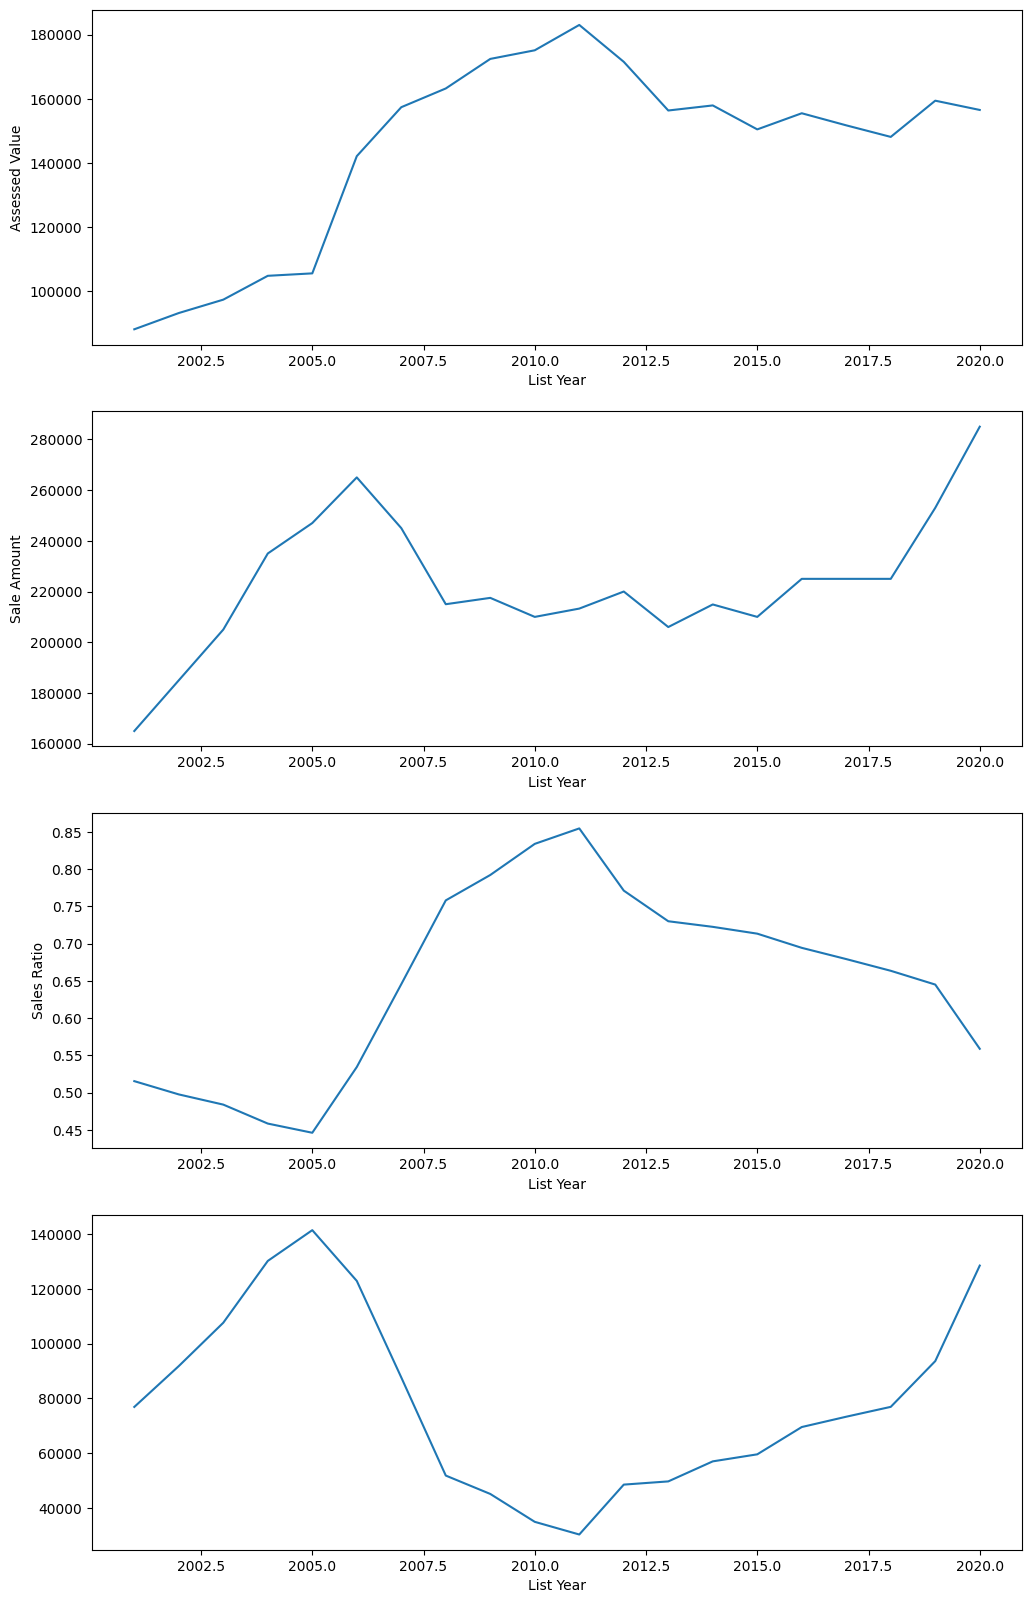

In [53]:
plt.figure(figsize=(12,20))

plt.subplot(411)
tmp_df = df.groupby("List Year").agg({"Assessed Value":"median"})
sns.lineplot(x=tmp_df.index,y=tmp_df["Assessed Value"])

plt.subplot(412)
tmp_df = df.groupby("List Year").agg({"Sale Amount":"median"})
sns.lineplot(x=tmp_df.index,y=tmp_df["Sale Amount"])

plt.subplot(413)
tmp_df = df.groupby("List Year").agg({"Sales Ratio":"median"})
sns.lineplot(x=tmp_df.index,y=tmp_df["Sales Ratio"])

plt.subplot(414)
tmp_df = df.groupby("List Year").agg({"Assessed Value":"median","Sale Amount":"median"})
sns.lineplot(x=tmp_df.index,y=tmp_df["Sale Amount"]-tmp_df["Assessed Value"])
plt.show()

### In the first half of the 2010s, the Sales Ratio was large and demand was low, and in 2005, the Sales Ratio was small and demand was high.
### Profit and Sales Ratio are moving in the opposite direction.

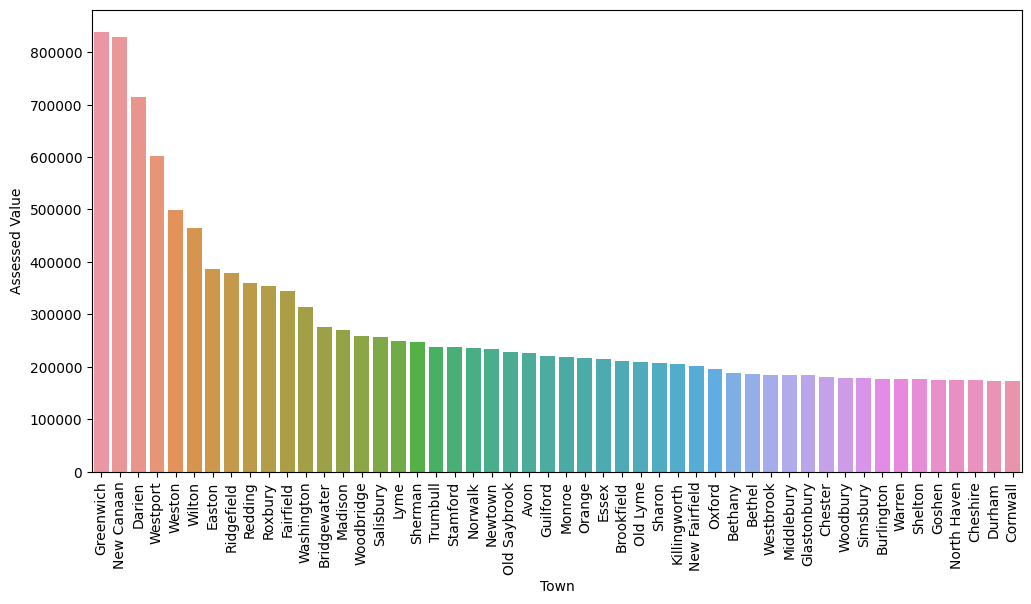

In [60]:
plt.figure(figsize=(12,6))
tmp_df = df.groupby("Town").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value",ascending=False)[:50]
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index,y=tmp_df["Assessed Value"])
plt.show()

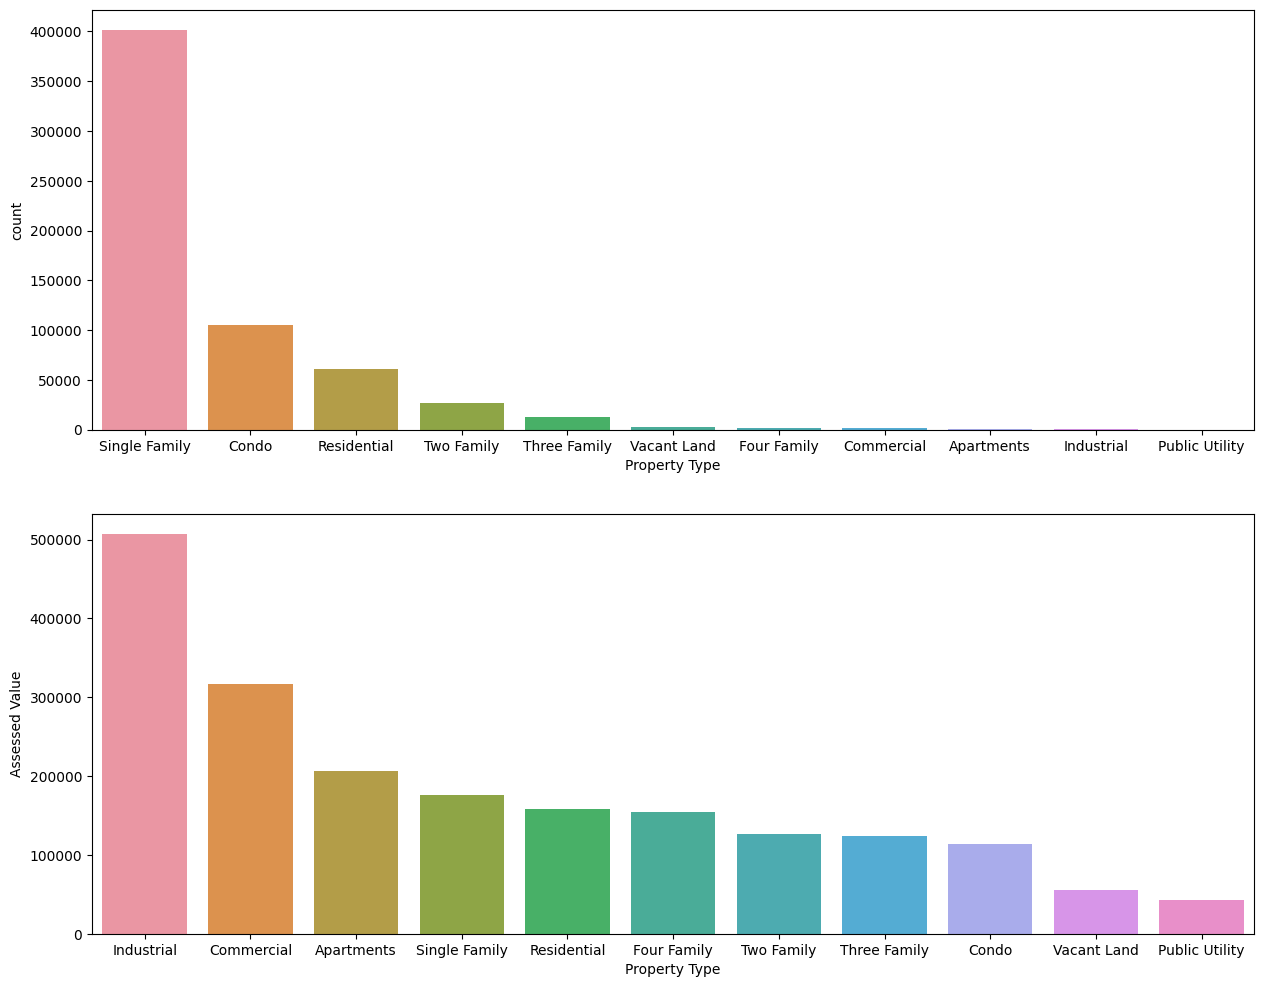

In [65]:
plt.figure(figsize=(15,12))

plt.subplot(211)
tmp_df = df["Property Type"].value_counts()
sns.barplot(x=tmp_df.index,y=tmp_df)

plt.subplot(212)
tmp_df = df.groupby("Property Type").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value",ascending=False)
sns.barplot(x=tmp_df.index,y=tmp_df["Assessed Value"])
plt.show()

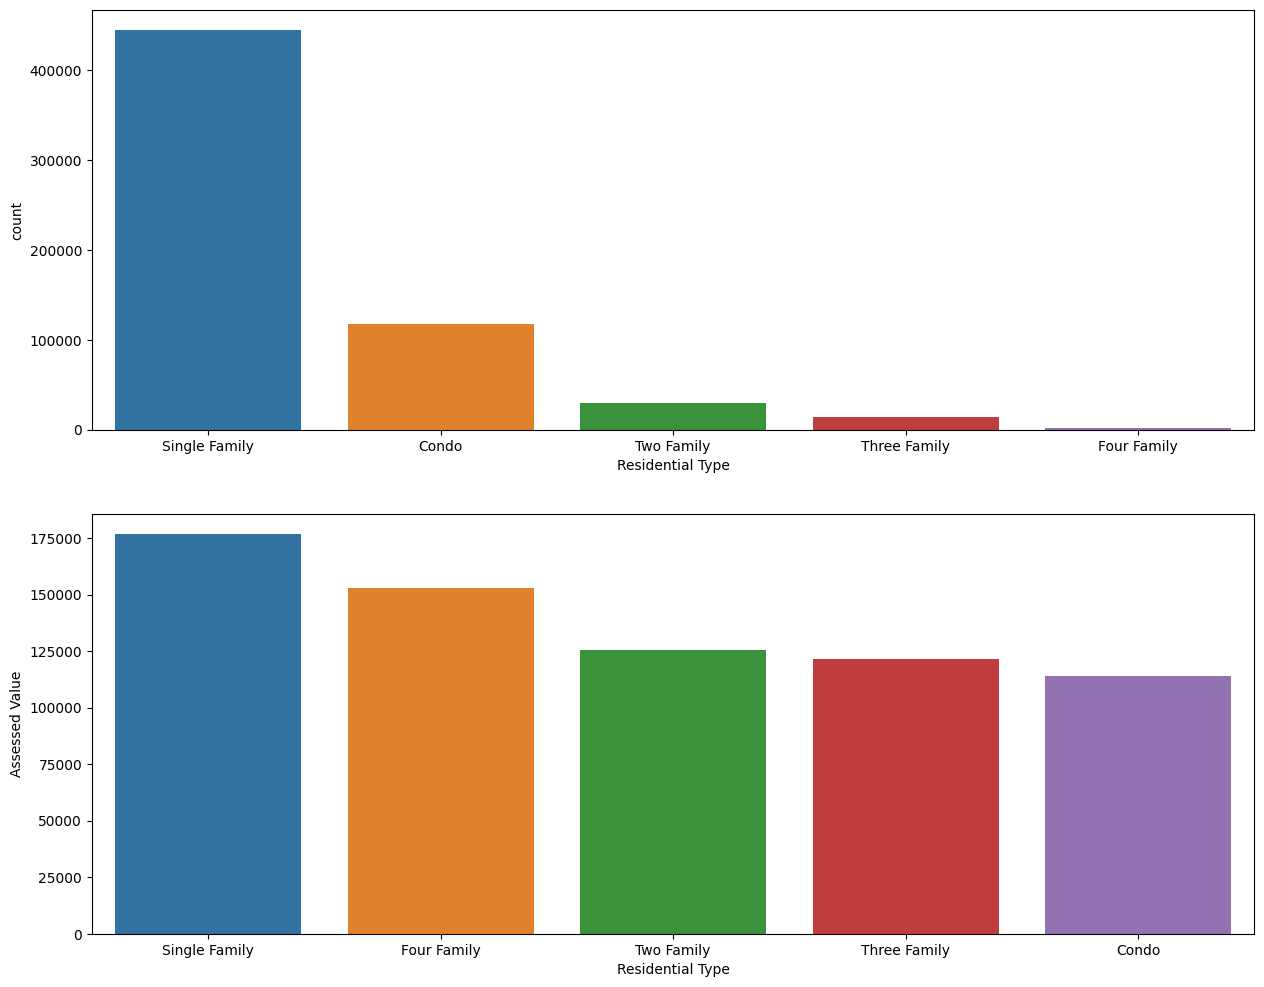

In [66]:
plt.figure(figsize=(15,12))

plt.subplot(211)
tmp_df = df["Residential Type"].value_counts()
sns.barplot(x=tmp_df.index,y=tmp_df)

plt.subplot(212)
tmp_df = df.groupby("Residential Type").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value",ascending=False)
sns.barplot(x=tmp_df.index,y=tmp_df["Assessed Value"])
plt.show()

### It is strange that single families are more expensive than 2-4 families.

# Conclusion
## 1.In the first half of the 2010s, the Sales Ratio was large and demand was low, and in 2005, the Sales Ratio was small and demand was high.
## 2.Single families are more expensive than 2-4 families.
## 3.I think it would be better if the floor area and surrounding land prices were available.